In [30]:
import matplotlib

In [23]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import MagneT 

In [26]:
M = MagneT.MagneT() 
g = M.gESS()

In [28]:
Om = M.OmegaC()

In [29]:
Mag = M.MagC()

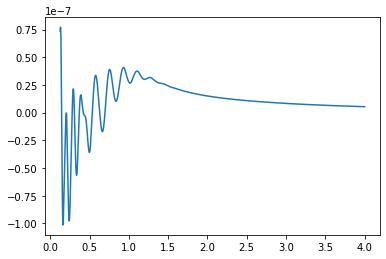

In [36]:
B = M._B[:-1]
plot(1/B,Mag)


In [38]:
#external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),
      html.Div(children='''
        Dash: A web application framework for Python.
    '''),

    dcc.Graph(
        id='example-graph',
        figure={
            'data': [
                {'x': B, 'y': Mag, 'type': 'bar', 'name': 'SF'},
                {'x': [1, 2, 3], 'y': [2, 4, 5], 'type': 'bar', 'name': u'Montréal'},
            ],
            'layout': {
                'title': 'Dash Data Visualization'
            }
        }
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)

AttributeError: '_NamespaceLoader' object has no attribute 'filename'